In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.stattools import coint
from sklearn.preprocessing import MinMaxScaler

In [3]:
facebook = pd.read_csv('./FB.csv')
apple = pd.read_csv('./AAPL.csv')

In [4]:
facebook.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-02,194.029999,196.570007,188.850006,196.440002,196.440002,24949000
1,2020-03-03,196.220001,197.240005,183.970001,185.889999,185.889999,27984100
2,2020-03-04,189.169998,191.830002,186.389999,191.759995,191.759995,23062500
3,2020-03-05,186.779999,188.990005,183.889999,185.169998,185.169998,19333400
4,2020-03-06,178.330002,183.779999,176.259995,181.089996,181.089996,24559600


In [5]:
facebook = facebook[['Date', 'Close']]
apple = apple[['Date', 'Close']]

In [6]:
facebook.head()

,Date,Close
0,2020-03-02,196.440002
1,2020-03-03,185.889999
2,2020-03-04,191.759995
3,2020-03-05,185.169998
4,2020-03-06,181.089996


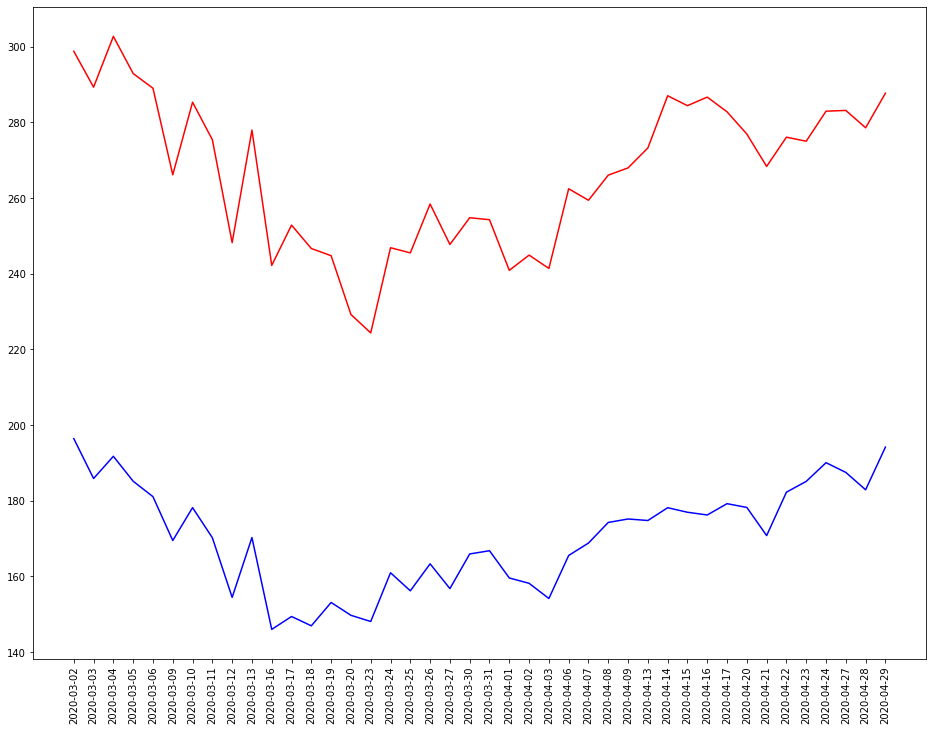

In [7]:
plt.figure(figsize=(16, 12))
plt.plot(facebook.Date, facebook.Close, color = 'blue')
plt.plot(apple.Date, apple.Close, color='red')
plt.xticks(rotation=90)
plt.show()

In [8]:
tmp_facebook = facebook.copy()
tmp_apple = apple.copy()
tmp_facebook.columns = ['Date', 'f_close']
tmp_apple.columns = ['Date', 'a_close']

tmp_merged = pd.merge(tmp_facebook, tmp_apple, on='Date')


In [9]:
tmp_merged.head()

,Date,f_close,a_close
0,2020-03-02,196.440002,298.809998
1,2020-03-03,185.889999,289.320007
2,2020-03-04,191.759995,302.739990
3,2020-03-05,185.169998,292.920013
4,2020-03-06,181.089996,289.029999


In [10]:
corr = tmp_merged[['f_close', 'a_close']].corr(method = 'pearson')

In [11]:
corr

,f_close,a_close
f_close,1.000000,0.924845
a_close,0.924845,1.000000


In [7]:
score, p_value, _ = coint(facebook.Close, apple.Close)
print('Mean: ' , (facebook.Close / apple.Close).mean())
print('Correlation: ', facebook.Close.corr(apple.Close))
print('Cointegration test p-value: ' ,p_value)

Mean:  0.639098299120728
Correlation:  0.9248451052812702
Cointegration test p-value:  0.31760131078723863


In [8]:
scaler = MinMaxScaler()
scaler.fit(facebook.Close.values.reshape(-1, 1))
facebook['Close'] = scaler.transform(facebook.Close.values.reshape(-1, 1))

In [9]:
scaler = MinMaxScaler()
scaler.fit(apple.Close.values.reshape(-1, 1))
apple['Close'] = scaler.transform(apple.Close.values.reshape(-1, 1))

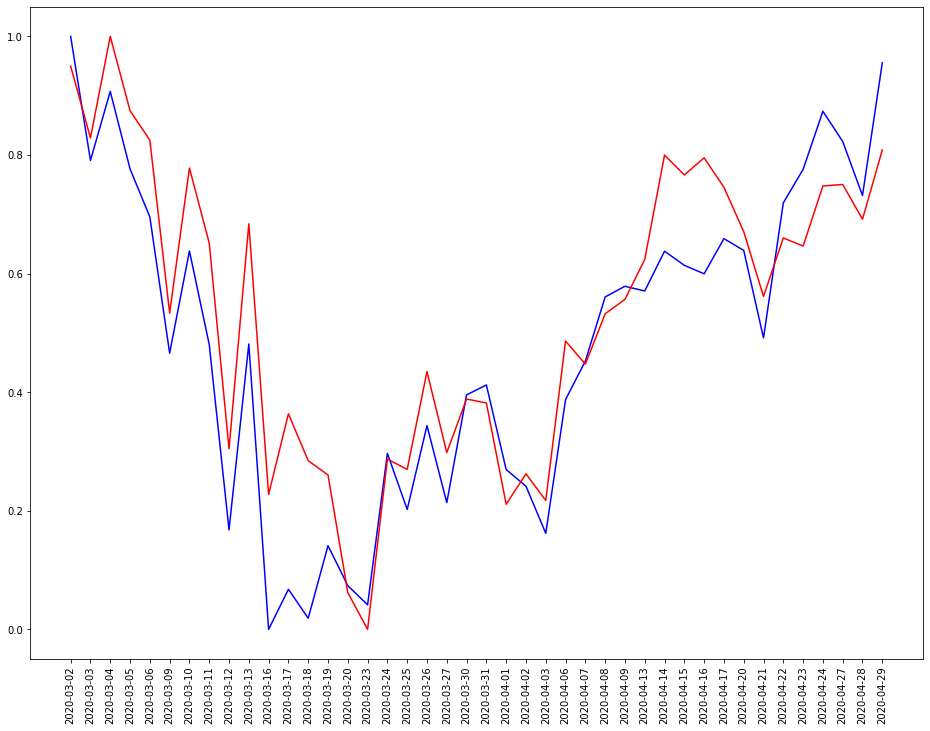

In [10]:
plt.figure(figsize=(16, 12))
plt.plot(facebook.Date, facebook.Close, color = 'blue')
plt.plot(apple.Date, apple.Close, color='red')
plt.xticks(rotation=90)
plt.show()

In [11]:
score, p_value, _ = coint(facebook.Close, apple.Close)
print('Correlation: ', facebook.Close.corr(apple.Close))
print('Cointegration test p-value: ' ,p_value)

Correlation:  0.9248451052812702
Cointegration test p-value:  0.31760131078723625
